In [1]:
from scipy.stats.qmc import LatinHypercube
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import parse_expr,symbols, lambdify

Create Latin Hypercube sampler instance

In [9]:
num_layers = 5 # number of layers in the onion model
layers = [] # list containing samples for each layers
layer_size = (1-0.5)/num_layers # size of each layer
#cng = layer_size
#llower_bound = 0 # lower bound for layer
#ulower_bound = 0.5 # upper bound for layer
num_vars = 7
sample_space = LatinHypercube(d=num_vars, seed=0)

sample_sizes = [50,25,25,25,25]*2 # half the sample size of each layer
lower_bounds = [0,0,1,2,3]
for i in range(1,num_layers+1):
    #llower_bound -= cng
    array = np.zeros((sample_sizes[i-1],num_vars+1))
    array[:, :-1] = (sample_space.random(n=sample_sizes[i-1]))+lower_bounds[i-1]
    #array[sample_sizes[i-1]:, :-1] = (sample_space.random(n=sample_sizes[i-1]))*cng+ulower_bound
    layers.append(array)
    #llower_bound+=1
    #ulower_bound += cng
    #for j in range(num_vars):

        #layers[i-1] = layers[i-1][((layers[i-1][j] >=lower_bound) & (layers[i-1][j] < (lower_bound+cng))) | ((layers[i-1][j] >=(upper_bound-cng)) & (layers[i-1][j] < (upper_bound)))]


In [15]:
print([np.max(x)-np.min(x) for x in layers])

[0.9975461867964784, 0.9945339196845336, 1.9893440362506682, 2.999409199803222, 3.9991381002153057]


In [20]:
sample_space.random(n=sample_sizes[3])+lower_bounds[3]

array([[2.56553775, 2.86425584, 2.84651534, 2.56750664, 2.23525508,
        2.65324648, 2.727049  ],
       [2.76651824, 2.22327379, 2.35137932, 2.51316833, 2.72589671,
        2.74665908, 2.24776729],
       [2.73567063, 2.83130859, 2.98321223, 2.00772995, 2.96519514,
        2.90588937, 2.28878109],
       [2.31770992, 2.57884937, 2.67446367, 2.40150171, 2.01206519,
        2.70582017, 2.88154448],
       [2.07599228, 2.30203314, 2.42765734, 2.04030276, 2.5564614 ,
        2.01889613, 2.47108661],
       [2.09218116, 2.18117428, 2.12588253, 2.93135521, 2.28954862,
        2.26741139, 2.07374736],
       [2.34454735, 2.63850228, 2.23026084, 2.09542845, 2.15192737,
        2.15845349, 2.81746502],
       [2.64877967, 2.51243413, 2.88307456, 2.46633079, 2.89878549,
        2.9346807 , 2.17806349],
       [2.97669742, 2.39586164, 2.61998875, 2.89000651, 2.51434118,
        2.40285092, 2.11746221],
       [2.12880032, 2.06452176, 2.58825421, 2.28601849, 2.36716398,
        2.33571902, 2.5

In [72]:
print(layers[4].shape)

(50, 8)


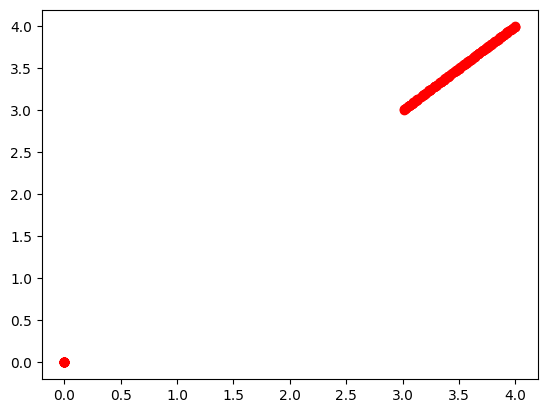

In [21]:
plt.plot(layers[4], layers[4], 'ro')

Column titles as follows:
d_0 U_r P_A ALR u_l sigma rho_l
Target: SMD

Chem eng formula in sympy

In [22]:
expr = parse_expr("d*0.48*(s/(ra*ur**2*d)**(0.4))*(1+1/A)**(0.4)+d*0.15*(ul**2/(s*rl*d))**0.5*(1+1/A)")
syms = symbols('d, ur, ra, A, ul, s, rl')
lamda_expr = np.vectorize(lambdify(syms, expr, modules=["scipy", "numpy"]))
for i in range(len(layers)):
    layers[i][:,-1] = lamda_expr(*(layers[i][:,:-1].T.tolist()))
    tmax = np.max(layers[i][:,-1])
    tmin = np.min(layers[i][:,-1])
    layers[i][:,-1] = (layers[i][:,-1]-tmin)/(tmax-tmin)

In [23]:
print(layers)

[array([[3.47260766e-01, 7.14604266e-01, 5.39180530e-01, 8.99669447e-01,
        8.37345952e-02, 2.01744888e-01, 5.47867284e-01, 1.75383667e-03],
       [4.85410069e-01, 9.09127500e-01, 5.81298552e-01, 5.23682929e-01,
        1.79945230e-01, 2.28519145e-02, 6.39328288e-01, 1.22695466e-02],
       [2.05406891e-01, 5.36486888e-01, 2.62736422e-01, 6.89170776e-01,
        2.14005762e-01, 3.71546256e-01, 1.59433607e-01, 1.07706464e-02],
       [3.77514334e-01, 4.46587512e-01, 6.67056210e-01, 7.87692298e-01,
        7.32326449e-01, 8.00558013e-02, 4.40383293e-01, 2.66146273e-02],
       [2.66289160e-01, 2.86990814e-01, 2.26231065e-01, 9.12221572e-01,
        2.77298070e-01, 7.65570233e-01, 3.29492914e-01, 3.71855132e-02],
       [6.93795162e-01, 4.70283293e-01, 2.82210243e-01, 1.81319130e-01,
        2.92844096e-01, 2.68569403e-01, 8.33562612e-01, 3.64933946e-02],
       [5.88113999e-01, 1.13241775e-01, 1.52167620e-01, 5.02194513e-01,
        5.54568481e-02, 4.75362571e-02, 6.78319693e-01, 1

In [25]:
FILE_DEST = 'Test_Data_Final/chem_eng/'
filenames = ["train","test","extrap_1","extrap_2","extrap_3"]
for i in range(len(layers)):
    np.savetxt(FILE_DEST+'chemeng_'+filenames[i]+'.txt', layers[i], delimiter=' ')